In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium as fl

In [3]:
df = pd.read_csv('./laptops_10.csv')
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


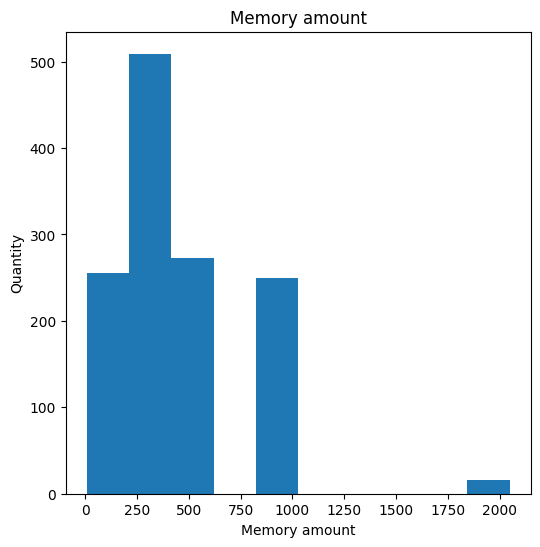

In [14]:
plt.figure(figsize=(6,6))
plt.hist(df['Memory_Amount'])
plt.xlabel('Memory amount')
plt.ylabel('Quantity')
plt.title('Memory amount');

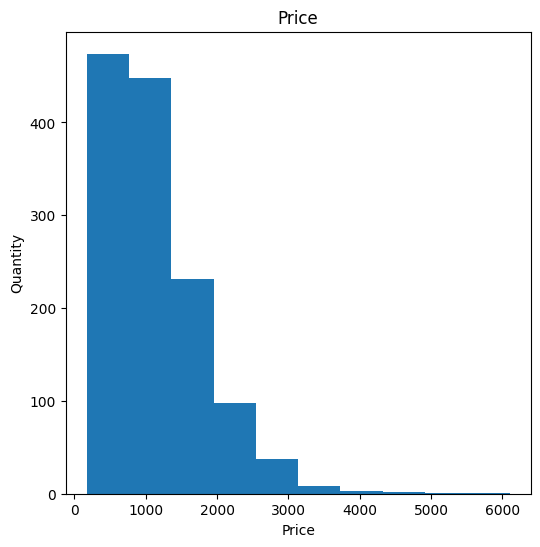

In [15]:
plt.figure(figsize=(6,6))
plt.hist(df['Price_euros'])
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title('Price');

In [16]:
data = df['Memory_Type'].value_counts()
data

SSD             641
HDD             576
FlashStorage     74
Hybrid           12
Name: Memory_Type, dtype: int64

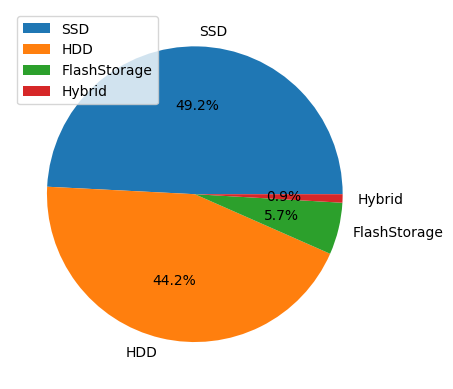

In [19]:
names = data.index
values = data.values
plt.pie(values, autopct='%.1f%%',labels=names);
plt.legend(names);



In [21]:
data = df['Company'].value_counts()
data

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

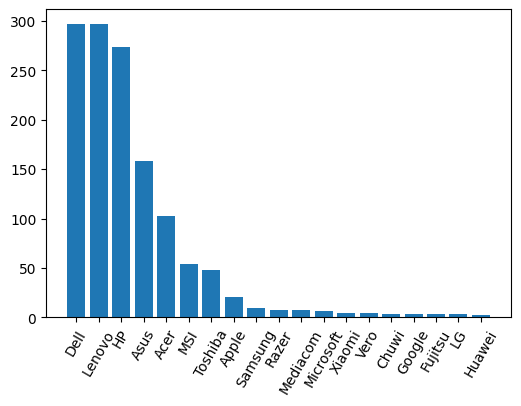

In [27]:
names = data.index
values = data.values

plt.figure(figsize=(6,4))
plt.bar(names, values)
plt.xticks(rotation=60);

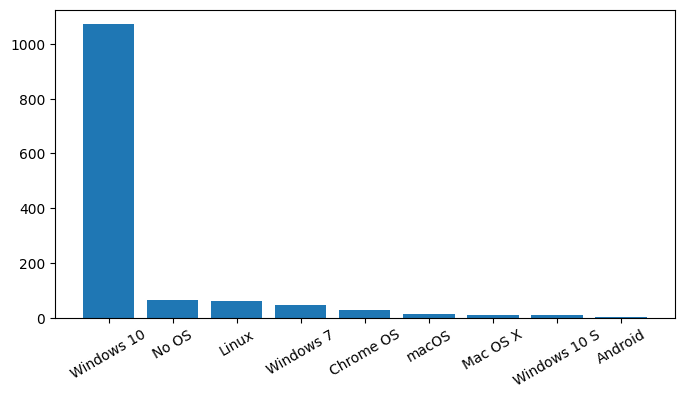

In [29]:
data = df['OpSys'].value_counts()
names = data.index
values = data.values

plt.figure(figsize=(8,4))
plt.bar(names,values);
plt.xticks(rotation=30);

In [31]:
data = pd.crosstab(df['Company'], df['Cpu_Company'])
data = data.drop(columns='Samsung').reset_index()
data

Cpu_Company,Company,AMD,Intel
0,Acer,10,93
1,Apple,0,21
2,Asus,11,147
3,Chuwi,0,3
4,Dell,0,297
5,Fujitsu,0,3
6,Google,0,3
7,HP,25,249
8,Huawei,0,2
9,LG,0,3


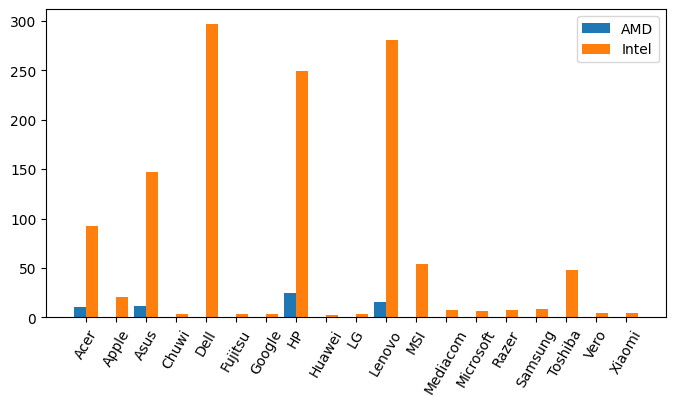

In [35]:
plt.figure(figsize=(8,4))
n_ticks = np.arange(len(data['Company']))
offset = 0.2
w = 0.4
plt.bar(n_ticks - offset, data['AMD'], width=w)
plt.bar(n_ticks + offset, data['Intel'], width=w)
plt.legend(['AMD','Intel'])
plt.xticks(n_ticks, data['Company'], rotation=60);

In [56]:
data = pd.crosstab(df['Company'], df['Cpu_Company'], normalize='index')
data = data.drop(columns='Samsung').reset_index()
data

Cpu_Company,Company,AMD,Intel
0,Acer,0.097087,0.902913
1,Apple,0.000000,1.000000
2,Asus,0.069620,0.930380
3,Chuwi,0.000000,1.000000
4,Dell,0.000000,1.000000
5,Fujitsu,0.000000,1.000000
6,Google,0.000000,1.000000
7,HP,0.091241,0.908759
8,Huawei,0.000000,1.000000
9,LG,0.000000,1.000000


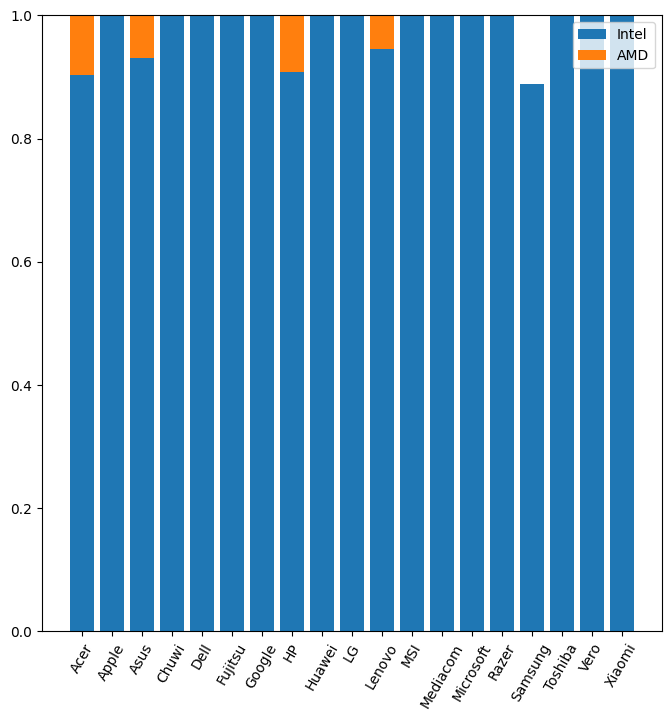

In [59]:
plt.figure(figsize=(8,8))
plt.bar(data['Company'], data['Intel'])
plt.bar(data['Company'], data['AMD'], bottom=data['Intel'])
plt.legend(['Intel', 'AMD']);
plt.xticks(rotation=60);